Vamos analisar os dados de venda de combustíveis automotivos no Brasil em 2023 para entender padrões, tendências e insights relevantes que possam surgir

> **Descrição do Problema:**

O setor de combustíveis automotivos é essencial para a economia brasileira, afetando diretamente os consumidores e a indústria automobilística. Compreender as tendências de venda pode oferecer insights importantes sobre a demanda por diferentes tipos de combustíveis em diferentes regiões do país.

> **Proposta** **de** **Solução:**



Utilizando a análise exploratória de dados, podemos identificar padrões de consumo, variações geográficas e comportamentos de preços para auxiliar no planejamento estratégico das empresas do setor e nas políticas públicas relacionadas aos combustíveis.

> **Descrição** **das** **Variáveis**

1.  Região - Sigla: Sigla da região geográfica onde ocorreu a venda (Norte, Nordeste, Centro-Oeste, Sudeste, Sul).

2.  Estado - Sigla: Sigla do estado onde ocorreu a venda.

1.   Produto: Tipo de combustível vendido.

2.   Data da Coleta: Data em que os dados foram coletados.

1.   Valor de Venda: Valor de venda do combustível.

2.   Bandeira: Marca ou bandeira do posto de combustível.














---





> **Importando** **o** **Data** **set**



In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

In [ ]:
Dataset = files.upload()

Saving AUTOMOTIVOS_2023.01.csv to AUTOMOTIVOS_2023.01.csv




> **Lendo** **o** **Data** **set**



In [ ]:
df = pd.read_csv ('AUTOMOTIVOS_2023.01.csv', delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47839 entries, 0 to 47838
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Regiao - Sigla     47839 non-null  object 
 1   Estado - Sigla     47839 non-null  object 
 2   Municipio          47839 non-null  object 
 3   Revenda            47839 non-null  object 
 4   CNPJ da Revenda    47839 non-null  object 
 5   Nome da Rua        47839 non-null  object 
 6   Numero Rua         47831 non-null  object 
 7   Complemento        10702 non-null  object 
 8   Bairro             47762 non-null  object 
 9   Cep                47839 non-null  object 
 10  Produto            47839 non-null  object 
 11  Data da Coleta     47839 non-null  object 
 12  Valor de Venda     47839 non-null  object 
 13  Valor de Compra    0 non-null      float64
 14  Unidade de Medida  47839 non-null  object 
 15  Bandeira           47839 non-null  object 
dtypes: float64(1), object(



> **Excluindo**  ***colunas***



In [ ]:
Del_colunas = ['CNPJ da Revenda', 'Cep', 'Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro', 'Municipio', 'Valor de Compra', 'Unidade de Medida']
df.drop(Del_colunas, axis=1, inplace=True)


> **Data set**  **modificado**


In [ ]:
df.head()

,Regiao - Sigla,Estado - Sigla,Produto,Data da Coleta,Valor de Venda,Bandeira
0,SE,SP,ETANOL,2023-03-01,3.39,BRANCA
1,SE,SP,DIESEL S10,2023-03-01,6.21,BRANCA
2,SE,SP,GASOLINA,2023-03-01,4.39,BRANCA
3,NE,AL,ETANOL,2023-02-01,3.89,VIBRA ENERGIA
4,NE,AL,DIESEL,2023-02-01,6.49,VIBRA ENERGIA


In [ ]:
# Substituir vírgulas por pontos na coluna valor de venda
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.')

# Converter a coluna valor de venda para float
df['Valor de Venda'] = df['Valor de Venda'].astype(float)
# Converter a data da venda para data
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'])


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47839 entries, 0 to 47838
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Regiao - Sigla  47839 non-null  object        
 1   Estado - Sigla  47839 non-null  object        
 2   Produto         47839 non-null  object        
 3   Data da Coleta  47839 non-null  datetime64[ns]
 4   Valor de Venda  47839 non-null  float64       
 5   Bandeira        47839 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.2+ MB


<ipython-input-111-114c7f34ad44>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'])


In [ ]:
df.describe()

,Valor de Venda
count,47839.000000
mean,5.273481
std,0.925601
min,3.150000
25%,4.690000
50%,5.090000
75%,6.090000
max,8.490000


In [ ]:
valor_maximo_venda = df['Valor de Venda'].max()
media_venda = df['Valor de Venda'].mean()
print(media_venda)
print(valor_maximo_venda)

5.273481260059784
8.49


In [ ]:
# Soma das vendas por produto
soma_vendas_produto = df.groupby('Produto')['Valor de Venda'].sum().reset_index()
# Soma das vendas por região
soma_vendas_regiao = df.groupby('Regiao - Sigla')['Valor de Venda'].sum().reset_index()
# Soma das vendas por estado
soma_vendas_estado = df.groupby('Estado - Sigla')['Valor de Venda'].sum().reset_index()
#Soma das vendas por bandeira
soma_vendas_bandeira = df.groupby('Bandeira')['Valor de Venda'].sum().reset_index()
#  soma das vendas por ano e mês
soma_vendas_ano_mes = df.groupby(['Ano', 'Mês'])['Valor de Venda'].sum().reset_index()

In [ ]:
# Medidas estatísticas por região
medidas_estatisticas_regiao = df.groupby('Regiao - Sigla')['Valor de Venda'].describe()
medidas_estatisticas_regiao

,count,mean,std,min,25%,50%,75%,max
Regiao - Sigla,,,,,,,,
CO,3674.0,5.155455,1.027476,3.17,4.5525,4.99,6.19,8.04
N,3166.0,5.718263,0.994729,3.77,4.9900,5.44,6.62,8.38
NE,8708.0,5.359738,0.902352,3.50,4.6800,5.29,6.15,7.98
S,8526.0,5.406389,0.769470,3.55,4.9400,5.25,6.09,7.75
SE,23765.0,5.153185,0.931083,3.15,4.5900,4.99,5.99,8.49


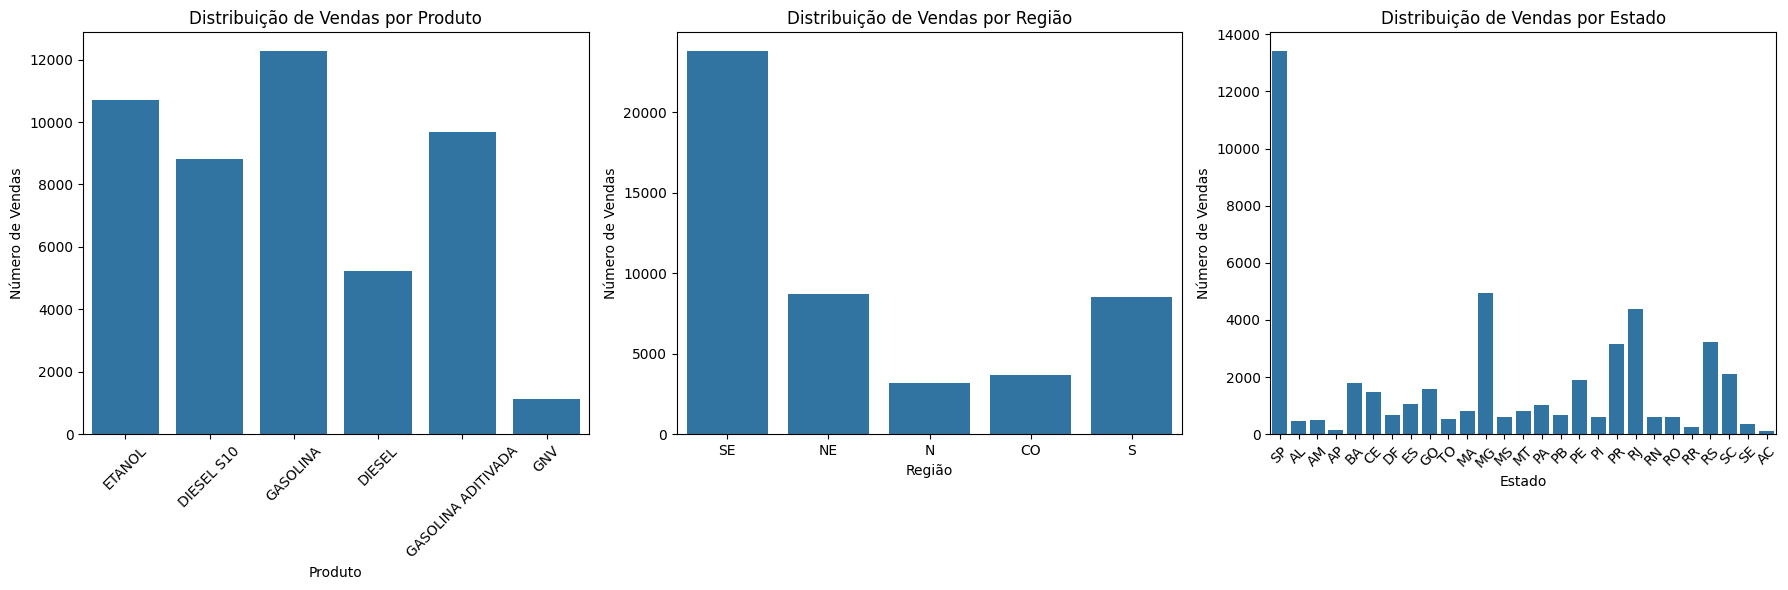

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do subplot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Distribuição de vendas por produto
sns.countplot(x='Produto', data=df, ax=axs[0])
axs[0].set_title('Distribuição de Vendas por Produto')
axs[0].set_xlabel('Produto')
axs[0].set_ylabel('Número de Vendas')
axs[0].tick_params(axis='x', rotation=45)

# Distribuição de vendas por região
sns.countplot(x='Regiao - Sigla', data=df, ax=axs[1])
axs[1].set_title('Distribuição de Vendas por Região')
axs[1].set_xlabel('Região')
axs[1].set_ylabel('Número de Vendas')

# Distribuição de vendas por estado
sns.countplot(x='Estado - Sigla', data=df, ax=axs[2])
axs[2].set_title('Distribuição de Vendas por Estado')
axs[2].set_xlabel('Estado')
axs[2].set_ylabel('Número de Vendas')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


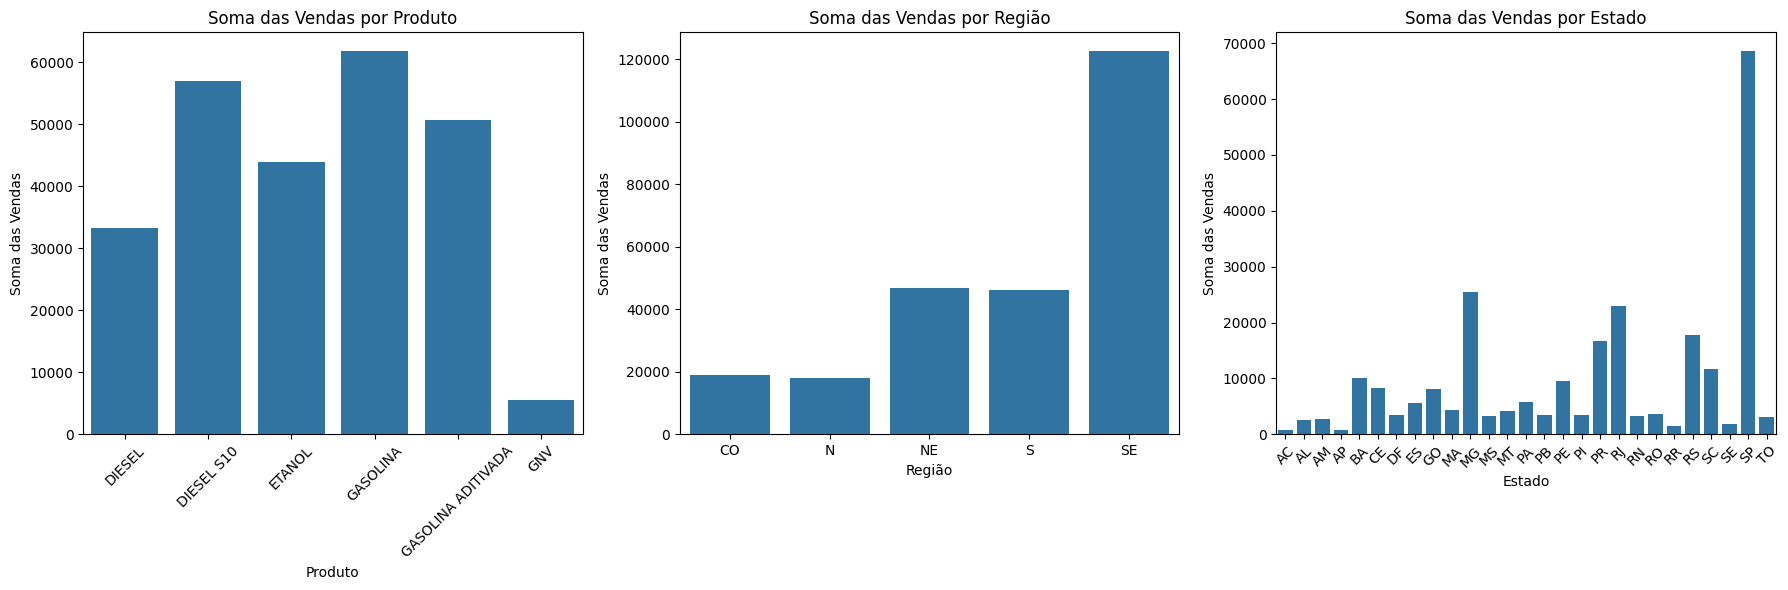

In [ ]:
#  subplot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# a soma das vendas por produto
sns.barplot(x='Produto', y='Valor de Venda', data=soma_vendas_produto, ax=axs[0])
axs[0].set_title('Soma das Vendas por Produto')
axs[0].set_xlabel('Produto')
axs[0].set_ylabel('Soma das Vendas')
axs[0].tick_params(axis='x', rotation=45)

#  soma das vendas por região
sns.barplot(x='Regiao - Sigla', y='Valor de Venda', data=soma_vendas_regiao, ax=axs[1])
axs[1].set_title('Soma das Vendas por Região')
axs[1].set_xlabel('Região')
axs[1].set_ylabel('Soma das Vendas')

#  soma das vendas por estado
sns.barplot(x='Estado - Sigla', y='Valor de Venda', data=soma_vendas_estado, ax=axs[2])
axs[2].set_title('Soma das Vendas por Estado')
axs[2].set_xlabel('Estado')
axs[2].set_ylabel('Soma das Vendas')
axs[2].tick_params(axis='x', rotation=45)


#exibição
plt.tight_layout()
plt.show()


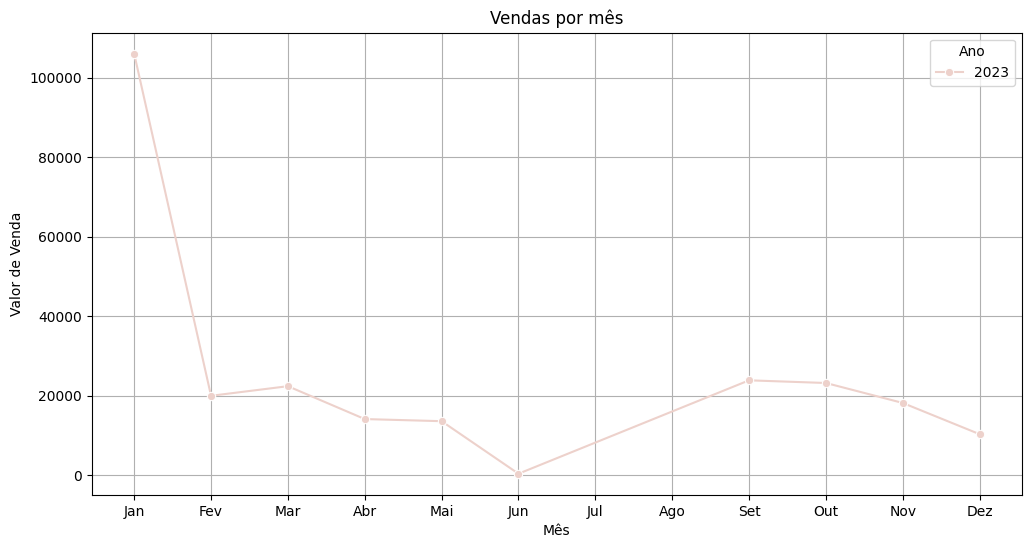

In [ ]:
# pegar o ano e o mês da coluna data da coleta
df['Ano'] = df['Data da Coleta'].dt.year
df['Mês'] = df['Data da Coleta'].dt.month


# Plotar o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=soma_vendas_ano_mes, x='Mês', y='Valor de Venda', hue='Ano', marker='o')
plt.title('Vendas por mês')
plt.xlabel('Mês')
plt.ylabel('Valor de Venda')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title='Ano')
plt.grid(True)
plt.show()


In [ ]:
# Ordenar as vendas por bandeira
ranking_bandeiras = soma_vendas_bandeira.sort_values(by='Valor de Venda', ascending=False)

# Resetar o índice para tornar 'Bandeira' uma coluna novamente
ranking_bandeiras.reset_index(drop=True, inplace=True)

top_10_bandeiras = ranking_bandeiras.head(10)
top_10_bandeiras


,Bandeira,Valor de Venda
0,BRANCA,80300.54
1,IPIRANGA,59204.20
2,VIBRA ENERGIA,56063.85
3,RAIZEN,33967.33
4,ALESAT,10167.43
5,SABBÁ,2697.35
6,RAIZEN MIME,1158.02
7,ATEM' S,1063.51
8,RODOIL,664.54
9,CHARRUA,529.94


> **Conclusão**

A análise exploratória de dados nos forneceu uma compreensão inicial do comportamento das vendas de combustíveis automotivos no Brasil em 2023. Identificamos padrões de consumo, variações geográficas e relacionamentos entre variáveis que podem ser explorados em análises mais detalhadas. Essas informações podem ser importantes acompanhamento das vendas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dividir os dados em conjunto de treinamento e teste
X = soma_vendas_ano_mes[['Ano', 'Mês']]
y = soma_vendas_ano_mes['Valor de Venda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prever as vendas com base nos meses e anos
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print("Erro quadrático médio:", mse)


Erro quadrático médio: 449626152.6274995


In [ ]:
import numpy as np

# Criar um DataFrame com os meses do primeiro trimestre de 2024
primeiro_trimestre_2024 = pd.DataFrame({'Ano': [2024]*3, 'Mês': [1, 2, 3]})

# Prever as vendas do primeiro trimestre de 2024 usando o modelo
vendas_previstas_2024 = model.predict(primeiro_trimestre_2024)

# Exibir as vendas previstas
print("Vendas Previstas para o Primeiro Trimestre de 2024:")
for i, venda in enumerate(vendas_previstas_2024):
    print(f"Mês {i+1}: {venda:.2f}")


Vendas Previstas para o Primeiro Trimestre de 2024:
Mês 1: 51362.50
Mês 2: 46676.25
Mês 3: 41990.00


In [ ]:
soma_vendas_ano_mes

,Ano,Mês,Valor de Venda
0,2023,1,106044.23
1,2023,2,20000.98
2,2023,3,22415.69
3,2023,4,14148.64
4,2023,5,13613.79
5,2023,6,399.48
6,2023,9,23892.38
7,2023,10,23219.91
8,2023,11,18199.69
9,2023,12,10343.28
